<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%202%20-%20Calculus%20and%20Data%20Visualisation/Week_2_Data_Analysis_Example_MNIST_without_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow 

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

## Libraries

In [0]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
Xinput_,yinput_ = x_train, y_train

Xinput_ = x_train.reshape(60000,784)
yinput_ = y_train.reshape(60000,)

In [4]:
Xinput_.shape

(60000, 784)

In [5]:
yinput_.shape

(60000,)

To know how many digits we have we can run this simple code

In [6]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(yinput_ == i), "times")

digit 0 appear 5923 times
digit 1 appear 6742 times
digit 2 appear 5958 times
digit 3 appear 6131 times
digit 4 appear 5842 times
digit 5 appear 5421 times
digit 6 appear 5918 times
digit 7 appear 6265 times
digit 8 appear 5851 times
digit 9 appear 5949 times


In [7]:
total = 0
for i in range(2):
    print ("digit", i, "makes", np.around(np.count_nonzero(yinput_ == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 8.5 % of the 70000 observations
digit 1 makes 9.6 % of the 70000 observations


# Select only digits 1 and 2

In [0]:
Xinput = Xinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]
yinput = yinput_[np.any([yinput_ == 1,yinput_ == 2], axis = 0)]

As usual we need to rescale the labels

In [0]:
yinput = yinput - 1

In [10]:
total = 0
for i in range(0,2,1):
    print ("Label", i, "makes", np.around(np.count_nonzero(yinput == i)/14867.0*100.0, decimals=1), "% of the 14867 observations")

Label 0 makes 45.3 % of the 14867 observations
Label 1 makes 40.1 % of the 14867 observations


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


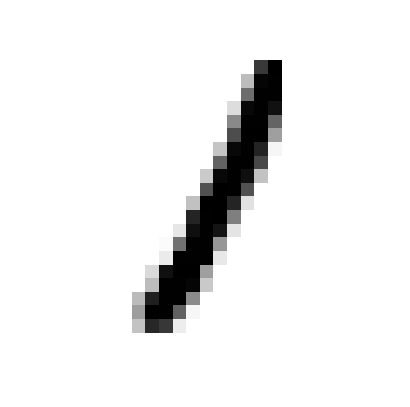

In [15]:
some_digit = Xinput[556,:]

some_digit_image = some_digit.reshape(28,28)

plt.figure(figsize=(10,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [12]:
print(Xinput.shape)
print(yinput.shape)

(12700, 784)
(12700,)


# Manual data analysis

Now let's check how our data is looking at after transforming the 2-D images into a 1-D vectors, that have 784 components (remember that our images are 28x28).

<Figure size 432x288 with 0 Axes>

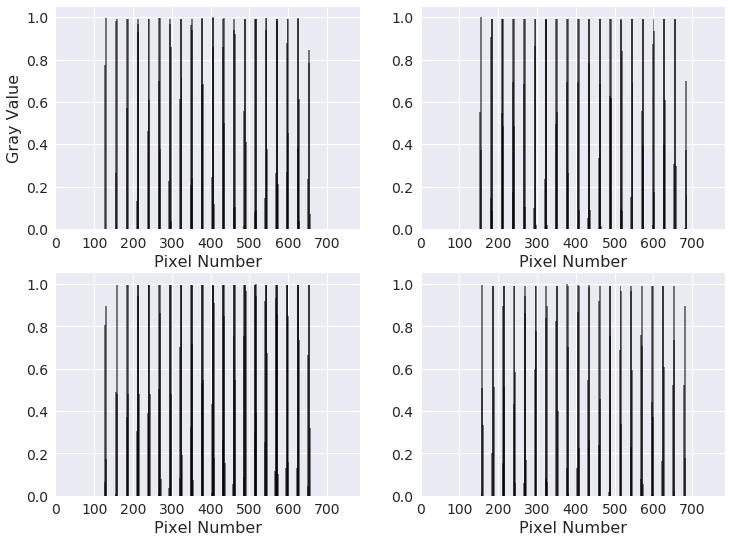

In [16]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput[556,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[78,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[111,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);




Is very interesting to note that all images look the same. Even without knowing what digit they are is rather simple to recognize that they must be the same digit!

### Another example of digit 1

<Figure size 432x288 with 0 Axes>

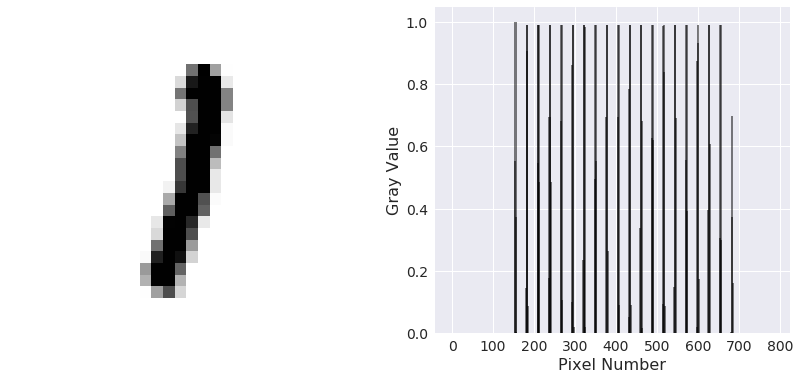

In [17]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[879,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
plt.bar(x=np.arange(0,784,1),height=Xinput[879,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);




### Digit 2

Now let's have a look at digit 2 and how it differs from digit 1

<Figure size 432x288 with 0 Axes>

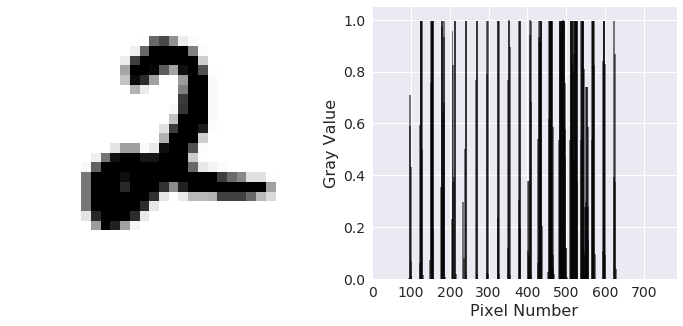

In [19]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)

some_digit = Xinput[555,:]
some_digit_image = some_digit.reshape(28,28)

ax.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

ax = fig.add_subplot(1, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[555,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

### Let's check some 2s

In [20]:
np.where(yinput == 1)

(array([    1,     5,     8, ..., 12695, 12697, 12698]),)

<Figure size 432x288 with 0 Axes>

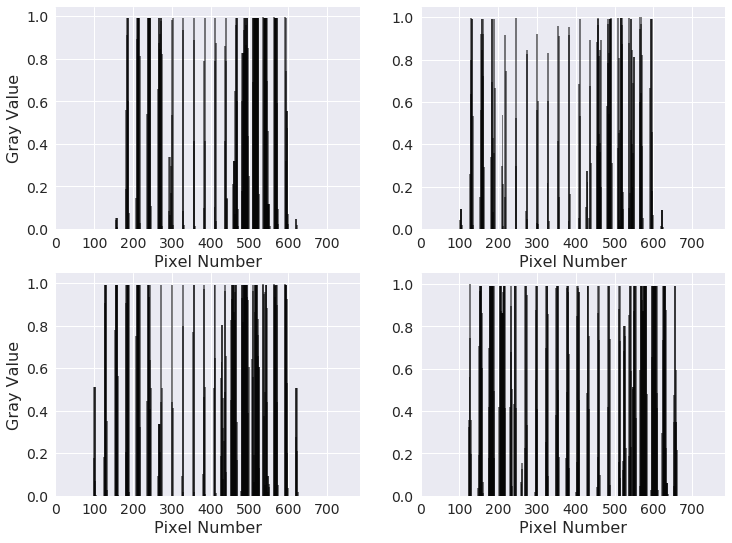

In [21]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(2, 2, 1)
plt.bar(x=np.arange(0,784,1),height=Xinput[12695,:], color = 'black', alpha = 0.5, width = 5.0)
#ax.set_ylim(0,6)
ax.set_xlim(0, 784)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 2)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[12698,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 3)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[12697,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

ax = fig.add_subplot(2, 2, 4)
#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[8,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


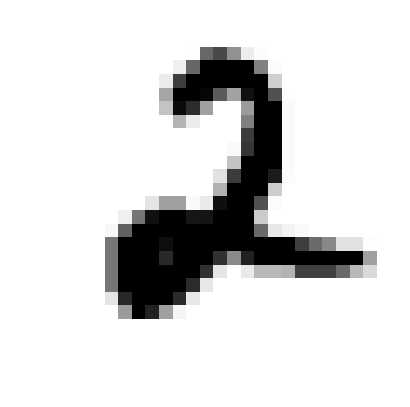

In [22]:
some_digit = Xinput[555,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

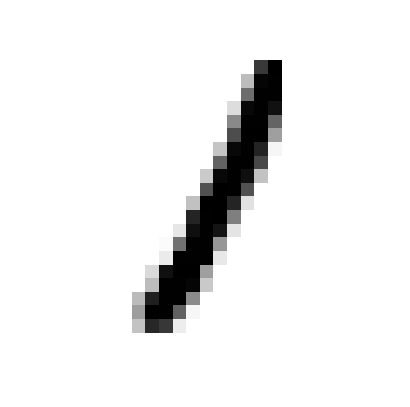

In [24]:
some_digit = Xinput[556,:]

some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(12,7))
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

# Distributions of gray values

Now is very instructive to study the distributions of gray values in the different digits to see what we can learn

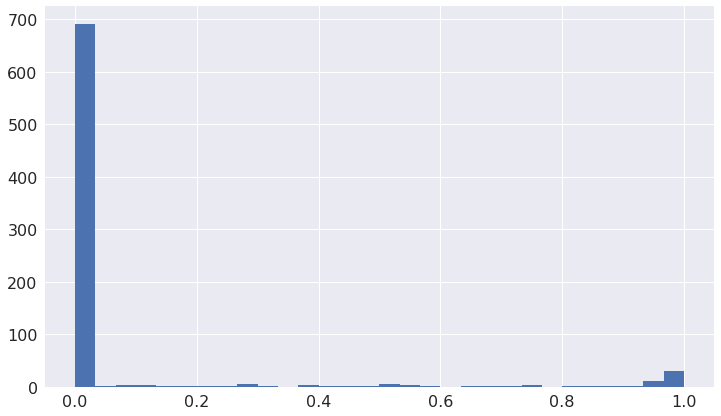

In [25]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(Xinput[123,:], bins = 30) # This is a one
plt.tick_params(labelsize=16)
plt.show()

as expected we get lots of white pixels. But that does not tell us much, it actually hide the real useful information. So let's remove the really white pixel from the histogram

In [29]:
digone = Xinput[556,:]
digtwo = Xinput[555,:]
digone = digone[digone > 5/255.0]
digtwo = digtwo[digtwo > 5/255.0]

print (Xinput[123,:].shape)
print (digone.shape)
print(digtwo.shape)

(784,)
(85,)
(173,)


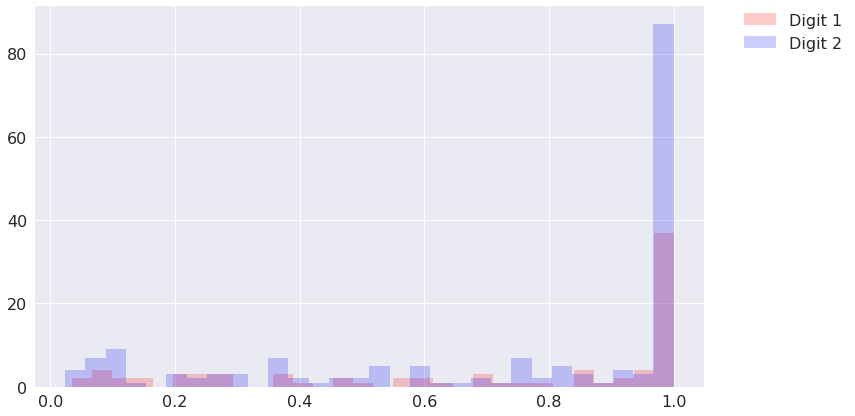

In [31]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(digone, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1')
plt.hist(digtwo, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

We can see that the two digits are slightly different but we cannot really use it to our advantage.

# Two new features

Let's define two new features that will allow us to distinguish between a one and a two. Consider the following digit 2 plotted as a 1-d Vector

<Figure size 432x288 with 0 Axes>

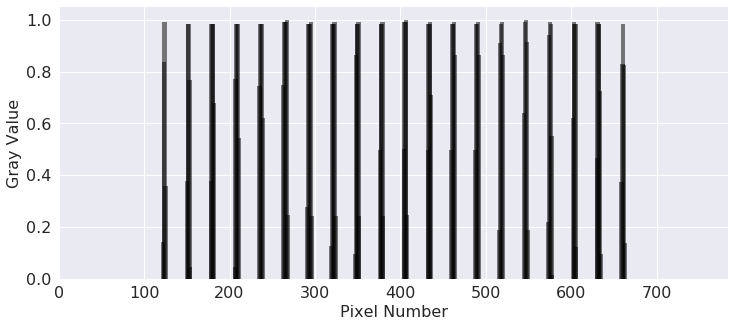

In [33]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 1, 1)

some_digit = Xinput[556,:]
some_digit_image = some_digit.reshape(28,28)

#ax.set_ylim(0,6)
#ax.set_xlim(0.982,0.991)
ax.set_xlim(0, 784)
plt.bar(x=np.arange(0,784,1),height=Xinput[9000,:], color = 'black', alpha = 0.5, width = 5.0)
ax.set_xlabel('Pixel Number', fontsize = 16)
ax.set_ylabel('Gray Value', fontsize = 16)
plt.tick_params(labelsize=16)

You will notice how there are more peaks between 100 and 300 and between 450 and 650. Let's define new features

In [0]:
left = np.sum(Xinput[:,100:300], axis = 1)
right = np.sum(Xinput[:,450:650], axis = 1)

Now let's see how they differ between ones and twos

In [0]:
leftones = left[yinput == 0]
lefttwos = left[yinput == 1]

rightones = right[yinput == 0]
righttwos =  right[yinput == 1]

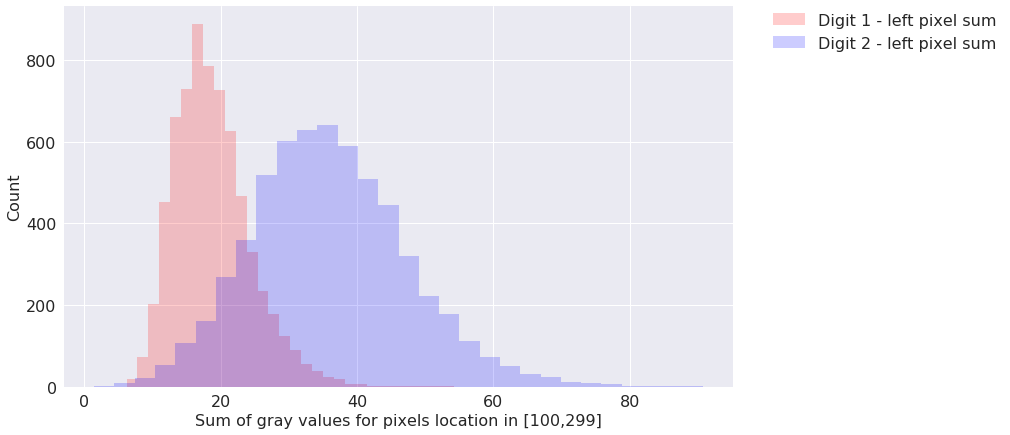

In [36]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(leftones, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1 - left pixel sum')
plt.hist(lefttwos, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2 - left pixel sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.xlabel('Sum of gray values for pixels location in [100,299]', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

Now we clearly see a difference! There are many more dark pixels in the are [100,299] for twos than for ones, as expected. Let's check the right part

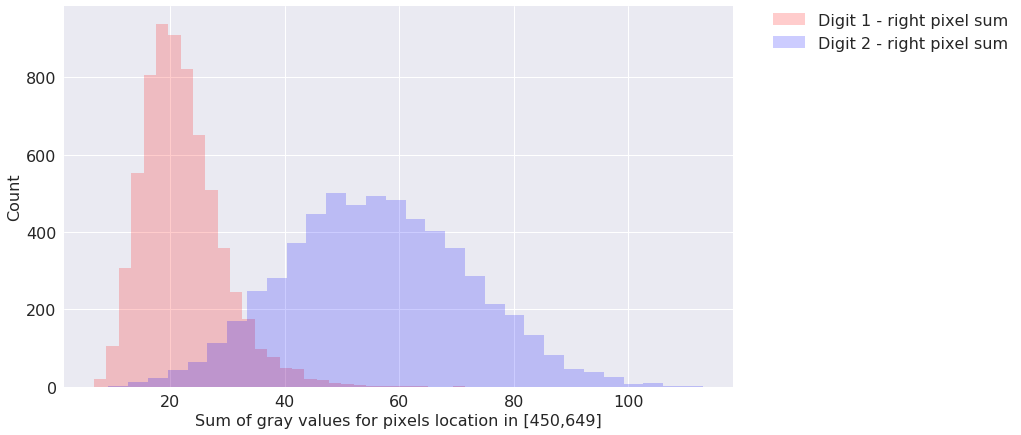

In [37]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.figure(figsize=(12,7))
plt.hist(rightones, bins = 30, alpha = 0.2, color = 'red', label = 'Digit 1 - right pixel sum')
plt.hist(righttwos, bins = 30, alpha = 0.2, color = 'blue', label = 'Digit 2 - right pixel sum')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.xlabel('Sum of gray values for pixels location in [450,649]', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.tick_params(labelsize=16)
plt.show()

Same situation on the right side. But in this region the different is even more pronounced. Now let's try to use this information to detect ones and twos.

## Predictions

We could decide that if the value of ```left``` lies below 7500 is a one and if above is a two.

In [0]:
pred = left > 6500/255.0

In [41]:
np.mean(pred == yinput)

0.8588976377952756

and simply in this way we get ca. 86% accuarcy!

let's now use also the right information.

In [0]:
pred2 = right > 7500/255.0

In [43]:
np.mean(pred2 == yinput)

0.9099212598425197

Here is even better! We get up to 90% accuarcy.

Now we could use both informations

In [0]:
pred = (left > 6500/255.0) & (right > 7500/255.0)

In [45]:
np.mean(pred2 == yinput)

0.9099212598425197

Out of curiosity we could try to find the best values for example for the right sum of pixels

In [46]:
chosen_value = 0
accuracy = 0
for i in range (0, yinput.shape[0]):
    pred = right > i
    accuracy_ = np.mean(pred == yinput)
    if (accuracy_ > accuracy ):
        accuracy = accuracy_
        chosen_value = i
        
print ('i', chosen_value)
print('accuracy', accuracy)

i 35
accuracy 0.9324409448818898


nice accuracy. Now let's try the left side

In [47]:
chosen_value = 0
accuracy = 0
for i in range (0, yinput.shape[0]):
    pred = left > i
    accuracy_ = np.mean(pred == yinput)
    if (accuracy_ > accuracy ):
        accuracy = accuracy_
        chosen_value = i
        
print ('i', chosen_value)
print('accuracy', accuracy)

i 26
accuracy 0.8583464566929134


# Conclusions

Simply summing the gray values on the right side of the image we can detect the digits with an accuracy of 93%. Without any machine learning algorithm.

Remember: check the data and learn how it is structured! Then you can design the right model!

# Exercise 1 (difficulty: medium)

Build a classifier, similar to what we have done before, using two other digits. You can choose which one. If you want a challenge try 3 and 8, or 1 and 7.

# Exercise 2 (difficulty: hard)

Try to build a classifier using 3 digits instead of 2. Choose for example 1,2 and 3.